# Banking Case Study

### Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


### Task

Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

Step - 1: Load the data

Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
    
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("C:/Users/saiki/OneDrive/Desktop/Projects/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
df.shape

(32581, 12)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
# df=df.style.hide_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df['person_emp_length'].fillna((df['person_emp_length'].mean()), inplace=True)
df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace=True)

In [14]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Identify Null values & Outliers

In [17]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Identifying The Outliers

<AxesSubplot:>

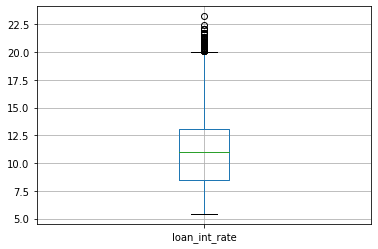

In [18]:
df.boxplot(column=['loan_int_rate'])

<AxesSubplot:>

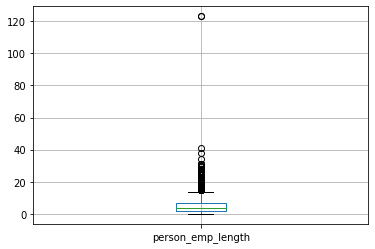

In [19]:
df.boxplot(column=['person_emp_length'])

### Identify The Input and Output/Target Variables

In [20]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [21]:
import sklearn

In [22]:
y=df['loan_status']
X=df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

### Split into Train and Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75, random_state=0)

In [25]:
X_train.shape

(24435, 11)

### Separating Categorical and Numerical Columns

In [26]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [27]:
X_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

### Categorical Columns

In [28]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12231,MORTGAGE,PERSONAL,A,N
23891,MORTGAGE,HOMEIMPROVEMENT,A,N
1191,RENT,HOMEIMPROVEMENT,E,N
8463,MORTGAGE,DEBTCONSOLIDATION,A,N
17638,RENT,PERSONAL,D,Y


### Numerical Columns

In [29]:
X_train_num = X_train.select_dtypes(include=['int','float'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,22,80000,4.0,7250,11.011695,0.09,3
23891,30,67000,6.0,10000,6.990000,0.15,6
1191,25,59160,0.0,16600,14.180000,0.28,4
8463,24,58000,5.0,7000,6.990000,0.12,4
17638,24,46000,0.0,5975,14.460000,0.13,4


### Scaling The Numerical Features

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler= StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,-0.905024,0.204465,-0.196943,-0.372728,0.000181,-0.751368,-0.690988
23891,0.360863,0.008150,0.286354,0.062224,-1.306708,-0.190787,0.050929
1191,-0.430316,-0.110243,-1.163535,1.106109,1.029752,1.023804,-0.443682
8463,-0.588552,-0.127760,0.044706,-0.412269,-1.306708,-0.471077,-0.443682
17638,-0.588552,-0.308974,-1.163535,-0.574387,1.120741,-0.377647,-0.443682


### OneHotEncoding Categorical (nominal) Columns

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),columns=encoder.get_feature_names(X_train_cat.columns),index = X_train_cat.index)
X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Label EnCoding Categorical(ordinal)Columns

In [34]:
encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [35]:
X_train_cat.loan_grade.unique()

array(['A', 'E', 'D', 'B', 'C', 'F', 'G'], dtype=object)

In [36]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
12231
23891
1191
8463
17638


In [37]:
loan_grade_encoder = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5  ,  'F' : 6  ,  'G' : 7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_train_cat_le.head()

,loan_grade
12231,1
23891,1
1191,5
8463,1
17638,4


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [38]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
12231,-0.905024,0.204465,-0.196943,-0.372728,0.000181,-0.751368,-0.690988,1
23891,0.360863,0.008150,0.286354,0.062224,-1.306708,-0.190787,0.050929,1
1191,-0.430316,-0.110243,-1.163535,1.106109,1.029752,1.023804,-0.443682,5
8463,-0.588552,-0.127760,0.044706,-0.412269,-1.306708,-0.471077,-0.443682,1
17638,-0.588552,-0.308974,-1.163535,-0.574387,1.120741,-0.377647,-0.443682,4


# Preparing Test Data

In [39]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2124,24,41300,RENT,2.0,EDUCATION,C,2400,12.68,0.06,N,2
252,24,85000,RENT,5.0,MEDICAL,B,25000,10.62,0.29,N,4
13083,24,88000,MORTGAGE,4.0,MEDICAL,B,6000,9.91,0.07,N,2
12447,23,81120,MORTGAGE,3.0,PERSONAL,B,15000,10.25,0.18,N,4
31009,39,73000,MORTGAGE,3.0,VENTURE,A,10000,7.51,0.14,N,14


In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 2124 to 709
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   int64  
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_percent_income         8146 non-null   float64
 9   cb_person_default_on_file   8146 non-null   object 
 10  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 763.7+ KB


### Separating Categorical and Numerical Columns

In [41]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2124,RENT,EDUCATION,C,N
252,RENT,MEDICAL,B,N
13083,MORTGAGE,MEDICAL,B,N
12447,MORTGAGE,PERSONAL,B,N
31009,MORTGAGE,VENTURE,A,N
...,...,...,...,...
1438,MORTGAGE,EDUCATION,A,N
28083,MORTGAGE,VENTURE,A,N
22127,MORTGAGE,PERSONAL,D,Y
10487,MORTGAGE,EDUCATION,A,N


In [42]:
X_test_num = X_test.select_dtypes(include=['int','float'])
X_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,24,41300,2.000000,2400,12.680000,0.06,2
252,24,85000,5.000000,25000,10.620000,0.29,4
13083,24,88000,4.000000,6000,9.910000,0.07,2
12447,23,81120,3.000000,15000,10.250000,0.18,4
31009,39,73000,3.000000,10000,7.510000,0.14,14
...,...,...,...,...,...,...,...
1438,21,26784,4.789686,2000,6.990000,0.07,3
28083,27,50000,0.000000,12000,6.620000,0.24,8
22127,30,52000,9.000000,9000,12.490000,0.17,6
10487,24,68000,7.000000,6000,7.880000,0.09,2


### Scaling The Numerical Features

In [43]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)
X_test_num_rescaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,-0.588552,-0.379950,-0.680239,-1.139825,0.542313,-1.031658,-0.938293
252,-0.588552,0.279971,0.044706,2.434689,-0.127104,1.117235,-0.443682
13083,-0.588552,0.325274,-0.196943,-0.570433,-0.357825,-0.938228,-0.938293
12447,-0.746788,0.221378,-0.438591,0.853046,-0.247339,0.089503,-0.443682
31009,1.784986,0.098757,-0.438591,0.062224,-1.137729,-0.284217,2.029373
...,...,...,...,...,...,...,...
1438,-1.063259,-0.599158,-0.006116,-1.203091,-1.306708,-0.938228,-0.690988
28083,-0.113844,-0.248570,-1.163535,0.378553,-1.426943,0.650084,0.545540
22127,0.360863,-0.218367,1.011298,-0.095940,0.480571,-0.003927,0.050929
10487,-0.588552,0.023251,0.528002,-0.570433,-1.017493,-0.751368,-0.938293


### LabelEncoding

In [44]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le

""
2124
252
13083
12447
31009
...
1438
28083
22127
10487


In [45]:
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

In [46]:
X_test_cat_le

,loan_grade
2124,3
252,2
13083,2
12447,2
31009,1
...,...
1438,1
28083,1
22127,4
10487,1


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [47]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_le],axis=1)
X_test_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade
2124,-0.588552,-0.379950,-0.680239,-1.139825,0.542313,-1.031658,-0.938293,3
252,-0.588552,0.279971,0.044706,2.434689,-0.127104,1.117235,-0.443682,2
13083,-0.588552,0.325274,-0.196943,-0.570433,-0.357825,-0.938228,-0.938293,2
12447,-0.746788,0.221378,-0.438591,0.853046,-0.247339,0.089503,-0.443682,2
31009,1.784986,0.098757,-0.438591,0.062224,-1.137729,-0.284217,2.029373,1
...,...,...,...,...,...,...,...,...
1438,-1.063259,-0.599158,-0.006116,-1.203091,-1.306708,-0.938228,-0.690988,1
28083,-0.113844,-0.248570,-1.163535,0.378553,-1.426943,0.650084,0.545540,1
22127,0.360863,-0.218367,1.011298,-0.095940,0.480571,-0.003927,0.050929,4
10487,-0.588552,0.023251,0.528002,-0.570433,-1.017493,-0.751368,-0.938293,1


# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [49]:
y_test_pred = classifier.predict(X_test_transformed)

In [50]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0


In [52]:
from sklearn.metrics import *

In [53]:
mat=confusion_matrix(temp_df['Actual'],temp_df['Predicted'])
mat

array([[5961,  521],
       [ 774,  890]], dtype=int64)

<AxesSubplot:>

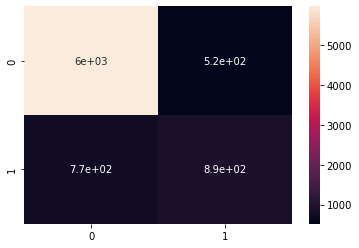

In [55]:
sns.heatmap(mat,annot=True)

In [56]:
890/(521+890),890/(774+890)

(0.6307583274273565, 0.5348557692307693)

In [57]:
print(classification_report(temp_df['Actual'],temp_df['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6482
           1       0.63      0.53      0.58      1664

    accuracy                           0.84      8146
   macro avg       0.76      0.73      0.74      8146
weighted avg       0.83      0.84      0.84      8146



In [73]:
precision_score(temp_df['Actual'],temp_df['Predicted'])

0.6307583274273565

In [67]:
confusion_matrix(temp_df['Predicted'],temp_df['Actual'])

array([[5961,  774],
       [ 521,  890]], dtype=int64)

In [70]:
print(classification_report(temp_df['Predicted'],temp_df['Actual']))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      6735
           1       0.53      0.63      0.58      1411

    accuracy                           0.84      8146
   macro avg       0.73      0.76      0.74      8146
weighted avg       0.85      0.84      0.85      8146



# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_transformed,y_train)

LogisticRegression(random_state=0)

In [84]:
y_test_pred = clf.predict(X_test_transformed)

In [85]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0


In [86]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.8448318192978149

# Support Vector Machines

In [93]:
from sklearn.svm import SVC  
clf1 = SVC(kernel='linear') 
clf1.fit(X_train_transformed, y_train)

SVC(kernel='linear')

In [94]:
y_test_pred = clf1.predict(X_test_transformed)

In [95]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0
...,...,...
1438,1,0
28083,0,0
22127,0,0
10487,0,0


In [98]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.8452000982077094

# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [100]:
y_test_pred =clf2.predict(X_test_transformed)

In [101]:
temp_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0
...,...,...
1438,1,1
28083,0,0
22127,0,0
10487,0,0


In [102]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.8390621163761355

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [104]:
y_test_pred =clf3.predict(X_test_transformed)

In [105]:
temp_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0
...,...,...
1438,1,0
28083,0,0
22127,0,1
10487,0,0


In [106]:
accuracy_score(temp_df['Actual'],temp_df['Predicted'])

0.8799410753744169

In [107]:
import matplotlib.pyplot as plt
data={"Algorithms":['knearestneighbours','LogisticRegression','SupportVectorMachine','RandomForest','DecisionTree'],
      "prediction_percentage":[84.1,84.4,84.5,87.9,83.9]}
data_=pd.DataFrame(data)
data_

,Algorithms,prediction_percentage
0,knearestneighbours,84.1
1,LogisticRegression,84.4
2,SupportVectorMachine,84.5
3,RandomForest,87.9
4,DecisionTree,83.9


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

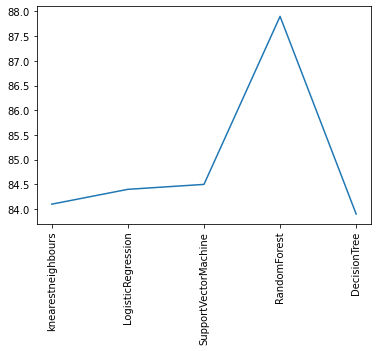

In [108]:
plt.plot(data_['Algorithms'],data_['prediction_percentage'])
plt.xticks(rotation=90)